# BETO model

In [1]:
import pandas as pd

## Datos

### Senators_data

In [25]:
data = pd.read_csv("/Users/mimihuerta/code/jomilu93/sivico/senators_data_2.csv", index_col='Unnamed: 0')
data

,senator_id,Apellidos,Nombre,Fraccion,Legislatura,Estado,Sexo,tipoEleccion,Suplente,estadoOrigen,...,url_sitio,telefono,extension,estatus,direccion,id,senadores,attendance_score,initiative_list,initatives_summary_dummy
0,1160,Botello Montes,José Alfredo,PAN,64,Querétaro,Hombre,Senador Electo por el Principio de Mayoría Rel...,NaN,Querétaro,...,NaN,5345 3000,4183 y 4184,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",1,José Alfredo Botello Montes,0.958904,['Pretende garantizar a los miembros del Servi...,Pretende garantizar a los miembros del Servici...
1,1162,Rojas Loreto,Estrella,PAN,64,Querétaro,Mujer,Senadora Electa por el Principio de Mayoría Re...,NaN,Querétaro,...,NaN,5345 3000,3323,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",2,Estrella Rojas Loreto,0.973913,['Propone que el Estado apoye la investigación...,Propone que el Estado apoye la investigación e...
2,1247,Moya Clemente,Roberto Juan,PAN,64,Lista Nacional,Hombre,Senador Electo por Representación Proporcional...,NaN,Lista Nacional,...,NaN,5345 3000,"3301, 5917 y 2122",en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",3,Roberto Juan Moya Clemente,0.826568,['Propone modificar las disposiciones constitu...,Propone modificar las disposiciones constituci...
3,1101,Bermúdez Méndez,José Erandi,PAN,64,Guanajuato,Hombre,Senador Electo por el Principio de Mayoría Rel...,Juan Antonio Negrete Martínez,Guanajuato,...,NaN,5345 3000,3268,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",4,José Erandi Bermúdez Méndez,0.868421,['Propone eliminar el requisito que establece ...,Propone eliminar el requisito que establece qu...
4,1052,Cruz Blackledge,Gina Andrea,PAN,64,Baja California,Mujer,Senadora Electa por el Principio de Primera Mi...,Iraís María Vázquez Aguiar,Baja California,...,NaN,5345 3000,3388,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",5,Gina Andrea Cruz Blackledge,0.884868,['Propone modificar las disposiciones constitu...,Propone modificar las disposiciones constituci...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1274,Vasconcelos,Héctor,morena,64,Lista Nacional,Hombre,Senador Electo por Representación Proporcional...,NaN,Lista Nacional,...,http://hectorvasconcelos.mx,5345 3000,3657,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",122,Héctor Vasconcelos,0.871711,['Propone establecer un lenguaje en materia de...,Propone establecer un lenguaje en materia de p...
122,1273,Vázquez Alatorre,Antares Guadalupe,morena,64,Lista Nacional,Mujer,Senadora Electa por Representación Proporciona...,NaN,Lista Nacional,...,NaN,5345 3000,3834,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",123,Antares Guadalupe Vázquez Alatorre,0.957237,['Propone expedir la Ley reglamentaria del Art...,Propone expedir la Ley reglamentaria del Artíc...
123,1169,Villegas Canché,Freyda Marybel,morena,64,Quintana Roo,Mujer,Senadora Electa por el Principio de Mayoría Re...,Gabriela López Gómez,Quintana Roo,...,http://marybelvillegas.mx/,5345 3000,3194,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",124,Freyda Marybel Villegas Canché,0.888446,['Propone adicionar la extorsión al catálogo d...,Propone adicionar la extorsión al catálogo de ...
124,1406,Jiménez Arteaga,Rosa Elena,morena,64,Nayarit,Mujer,Senadora Electa por el Principio de Mayoría Re...,Beatriz Andrea Navarro Pérez,Nayarit,...,NaN,5345 3000,3167,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",125,Rosa Elena Jiménez Arteaga,0.931034,['Propone establecer que la paternidad y el in...,Propone establecer que la paternidad y el inte...


In [26]:
type(data['initiative_list'])

pandas.core.series.Series

In [3]:
data['initiative_list'] = data['initiative_list'].str.replace('[', ' ').str.replace(']', ' ')

/var/folders/n7/388dqz5d5fd0c4nd5dh86cbh0000gp/T/ipykernel_27185/1660566254.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['initiative_list'] = data['initiative_list'].str.replace('[', ' ').str.replace(']', ' ')


In [4]:
columnas = data.columns
columnas

Index(['senator_id', 'Apellidos', 'Nombre', 'Fraccion', 'Legislatura',
       'Estado', 'Sexo', 'tipoEleccion', 'Suplente', 'estadoOrigen', 'correo',
       'facebook', 'twitter', 'youtube', 'instagram', 'url_sitio', 'telefono',
       'extension', 'estatus', 'direccion', 'id', 'senadores',
       'attendance_score', 'initiative_list', 'initatives_summary_dummy'],
      dtype='object')

In [5]:
print(data.shape)
data.head(2)

(126, 25)


,senator_id,Apellidos,Nombre,Fraccion,Legislatura,Estado,Sexo,tipoEleccion,Suplente,estadoOrigen,...,url_sitio,telefono,extension,estatus,direccion,id,senadores,attendance_score,initiative_list,initatives_summary_dummy
0,1160,Botello Montes,José Alfredo,PAN,64,Querétaro,Hombre,Senador Electo por el Principio de Mayoría Rel...,NaN,Querétaro,...,NaN,5345 3000,4183 y 4184,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",1,José Alfredo Botello Montes,0.958904,'Pretende garantizar a los miembros del Servi...,Pretende garantizar a los miembros del Servici...
1,1162,Rojas Loreto,Estrella,PAN,64,Querétaro,Mujer,Senadora Electa por el Principio de Mayoría Re...,NaN,Querétaro,...,NaN,5345 3000,3323,en_funciones,"Av Paseo de la Reforma No. 135, Hemiciclo Piso...",2,Estrella Rojas Loreto,0.973913,'Propone que el Estado apoye la investigación...,Propone que el Estado apoye la investigación e...


In [6]:
a = data['initatives_summary_dummy'][0]
a

'Pretende garantizar a los miembros del Servicio Exterior Mexicano, en un porcentaje mayor al que se establece en la legislación actual, el acceso a los cargos de representación del estado como Embajador o Cónsul.Propone establecer una mayor claridad en la subdivisión de las comisiones ordinarias de Educación, Cultura y Ciencia y Tecnología, suprimiendo la única denominación vigente de la comisión ordinaria de “Educación, Cultura, Ciencia y Tecnología”.Propone establecer que el instituto de Servicios Periciales y Ciencias Forenses será el área técnica de apoyo a la Fiscalía que tendrá como objetivo fortalecer su capacidad institucional para realizar sus funciones de manera especializada y científica.\r\n\r\nDetermina el establecimiento de un Servicio de Carrera Pericial.Propone establecer que las iniciativas ciudadanas tengan el carácter de preferente.Propone establecer que el Sistema Educativo Nacional considerará la educación en materia de privacidad y protección de sus datos persona

In [7]:
data['initiative_list'] = data['initiative_list'].str.replace(r'\r\n\r\n', " ")

/var/folders/n7/388dqz5d5fd0c4nd5dh86cbh0000gp/T/ipykernel_27185/1026395776.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['initiative_list'] = data['initiative_list'].str.replace(r'\r\n\r\n', " ")


In [8]:
data['initiative_list'][0]

" 'Pretende garantizar a los miembros del Servicio Exterior Mexicano, en un porcentaje mayor al que se establece en la legislación actual, el acceso a los cargos de representación del estado como Embajador o Cónsul.', 'Propone establecer una mayor claridad en la subdivisión de las comisiones ordinarias de Educación, Cultura y Ciencia y Tecnología, suprimiendo la única denominación vigente de la comisión ordinaria de “Educación, Cultura, Ciencia y Tecnología”.', 'Propone establecer que el instituto de Servicios Periciales y Ciencias Forenses será el área técnica de apoyo a la Fiscalía que tendrá como objetivo fortalecer su capacidad institucional para realizar sus funciones de manera especializada y científica.\\r\\n\\r\\nDetermina el establecimiento de un Servicio de Carrera Pericial.', 'Propone establecer que las iniciativas ciudadanas tengan el carácter de preferente.', 'Propone establecer que el Sistema Educativo Nacional considerará la educación en materia de privacidad y protecció

In [9]:
import string
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [11]:
def clean(column):
    """Remove punctuation, make strings lower case, remove numbers. Tokenize, remove stopwords and lemmatize."""
    #Removing punctuation.
    for punctuation in string.punctuation:
        column = column.apply(lambda x: x.replace(punctuation, ''))
    #Making lower case and removing whitespace.
    column = column.apply(lambda x: x.lower().strip())
    #Removing numbers
    column = column.apply(lambda x: re.sub(r'[0-9]', '', x))
    #Tokenize all rows.
    #column = column.apply(lambda x: word_tokenize(x))
    #Remove stopwords and words too frequently present in initiative language.
    stop_words = set(stopwords.words('spanish'))
    stop_words_extra = ("pretende", "propone", "exhorta", "modificar", "actualizar", "política", "general",
                        "caso", "derecho", "materia", "virtud", "referencias", "cambiar", "deberán", "día",
                        "año", "denominación", "distrito", "cámara", "senadores", "normativa", "senado",
                        "objetivo", "cumplimiento", "ordenamiento", "república", "reforma", "cada",
                        "dar", "federal", "secretaría", "mención", "paso", "dejar", "principio",
                        "ser", "paridad", "así", "derechos", "reformar", "propone", "nacional",
                        "establecer", "méxico", "persona", "ley", "ciudad", "deberá", "legal", "personas")
    column = column.apply(lambda x: [w for w in x if w not in stop_words])
    column = column.apply(lambda x: [w for w in x if w not in stop_words_extra])
    # Lemmatizing the verbs
    #column = column.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos = "v") for word in x])
    # 2 - Lemmatizing the nouns
    #column = column.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos = "n") for word in x])
    # Rejoin words to make sentences
    column = column.apply(lambda x: " ".join(x))
    return column

In [13]:
data["sintesis_clean"] = clean(data["initiative_list"])

In [14]:
data["sintesis_clean"]

0      garantizar miembros servicio exterior mexicano...
1      apoye investigación innovación científica huma...
2      disposiciones constitucionales relativas órgan...
3      eliminar requisito establece necesario trabaja...
4      disposiciones constitucionales relativas órgan...
                             ...                        
121    lenguaje género ámbito órganos jurisdiccionale...
122    expedir reglamentaria artículo fracción ix con...
123    adicionar extorsión catálogo delitos graves am...
124    paternidad interés superior niñez protegidos j...
125                                                     
Name: sintesis_clean, Length: 126, dtype: object

In [15]:
eg_summ = data['sintesis_clean'][0]
eg_summ

'garantizar miembros servicio exterior mexicano porcentaje mayor establece legislación actual acceso cargos representación embajador cónsul mayor claridad subdivisión comisiones ordinarias educación cultura ciencia tecnología suprimiendo única vigente comisión ordinaria “ educación cultura ciencia tecnología ” instituto servicios periciales ciencias forenses área técnica apoyo fiscalía fortalecer capacidad institucional realizar funciones manera especializada científicarnrndetermina establecimiento servicio carrera pericial iniciativas ciudadanas carácter preferente sistema educativo considerará educación privacidad protección datos personales ámbito digital incluida planes programas estudio expedir nuevo bases protección mujeres embarazadas vulnerables situación calle víctimas violencia violencia sexual cuales protección momento conozcan embarazo después nacimientornrncrea fondo apoyo maternidad fam operado sistema desarrollo integral familia dif considerado presupuesto egresos federa

In [16]:
i_column = data["initiative_list"]
i_column[0]

" 'Pretende garantizar a los miembros del Servicio Exterior Mexicano, en un porcentaje mayor al que se establece en la legislación actual, el acceso a los cargos de representación del estado como Embajador o Cónsul.', 'Propone establecer una mayor claridad en la subdivisión de las comisiones ordinarias de Educación, Cultura y Ciencia y Tecnología, suprimiendo la única denominación vigente de la comisión ordinaria de “Educación, Cultura, Ciencia y Tecnología”.', 'Propone establecer que el instituto de Servicios Periciales y Ciencias Forenses será el área técnica de apoyo a la Fiscalía que tendrá como objetivo fortalecer su capacidad institucional para realizar sus funciones de manera especializada y científica.\\r\\n\\r\\nDetermina el establecimiento de un Servicio de Carrera Pericial.', 'Propone establecer que las iniciativas ciudadanas tengan el carácter de preferente.', 'Propone establecer que el Sistema Educativo Nacional considerará la educación en materia de privacidad y protecció

<Axes: >

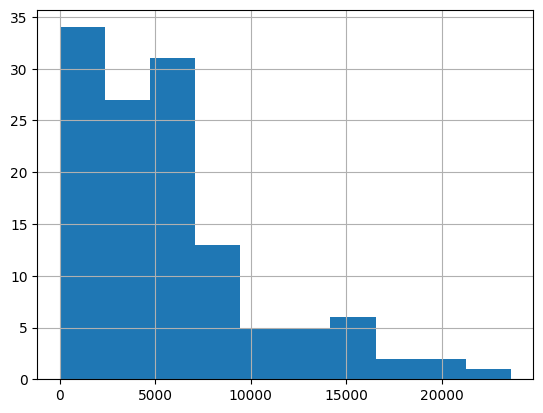

In [17]:
len_col = [len(prop_in.split()) for prop_in in i_column]

pd.Series(len_col).hist()

### Inipros

In [ ]:
data_ip = pd.read_csv("/Users/mimihuerta/code/jomilu93/sivico/inipros.csv", index_col='Unnamed: 0')

In [ ]:
print(data_ip.shape)
data_ip.head(2)

In [ ]:
eg1 = data_ip['sintesis'][7827]
eg1

In [ ]:
ip_column = data_ip["sintesis"]
ip_column

In [ ]:
len_col_ip = [len(prop_in.split()) for prop_in in ip_column]

pd.Series(len_col_ip).hist()

## Model

### Opción 1

In [18]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [19]:
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")

The following encoder weights were not tied to the decoder ['bert/pooler']
Some weights of EncoderDecoderModel were not initialized from the model checkpoint at mrm8488/bert2bert_shared-spanish-finetuned-summarization and are newly initialized: ['decoder.bert.encoder.layer.3.attention.output.dense.weight', 'decoder.bert.encoder.layer.9.attention.self.value.weight', 'decoder.bert.encoder.layer.7.attention.self.query.bias', 'decoder.bert.encoder.layer.8.attention.self.key.weight', 'decoder.bert.encoder.layer.6.attention.output.LayerNorm.weight', 'decoder.bert.encoder.layer.2.attention.self.query.weight', 'decoder.bert.encoder.layer.10.attention.output.LayerNorm.bias', 'decoder.bert.encoder.layer.0.attention.output.dense.weight', 'decoder.bert.encoder.layer.9.output.dense.weight', 'decoder.bert.encoder.layer.6.attention.self.key.bias', 'decoder.bert.encoder.layer.9.attention.self.query.weight', 'decoder.bert.encoder.layer.8.attention.self.query.bias', 'decoder.bert.encoder.layer.8.interme

The following encoder weights were not tied to the decoder ['bert/pooler']


In [20]:
inputs = tokenizer.encode("RESUMEN: " + eg_summ, return_tensors="pt", max_length=512, truncation=True)
inputs

tensor([[    4, 12159, 10368,  2488,  1181,  3976,  1923,  2981,  5631, 12049,
          7780,  1795,  4205,  4348,  3627,  3209,  7554,  6595, 15630, 11797,
         19078,  1795, 12404, 15403,  2304, 10726, 28613,  3407,  5349,  6809,
          4660, 10756,  1360,  3476,  8155,  6699, 17748,     3,  3407,  5349,
          6809,  4660,     3, 12168,  2287,  4085,  2306, 11570, 18659, 30934,
          4378,  4541,  2731, 27730,  8362,  3201,  9809,  3335,  4126,  2233,
         16371,  9629, 30936, 30935, 30936, 30935, 12479, 30936, 11156,  5109,
          2981,  4190,  4085,  1418,  6020, 22157, 30934,  3584,  6825,  1099,
          2116, 11292, 14836,  3407, 17457,  2888,  2521,  7749,  3643, 10894,
          6700,  4846,  2873,  3640, 28465,  1962,  6739,  2888,  2409, 21660,
         11449,  2504,  3783,  5205,  4430,  4430,  6014,  3556,  2888,  1989,
         27809, 13097,  1888,  7699, 30936, 30935, 30936, 30935,  1758, 30932,
          4627,  2731, 16096,  3631, 30943,  6280,  

In [21]:
resumen = model.generate(
    inputs, 
    max_length=300,
    min_length=40, 
    length_penalty=2.0, 
    num_beams=4, 
    early_stopping=True)

In [22]:
print(tokenizer.decode(resumen[0]))

2023-07-11 20:24:14.814501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[CLS] El servicio exterior mexicano cuenta con legislación actual acceso de representación embajador cónsul mayor claridad subdivisión comisiones ordinarias ordinarias educación cultura científica tecnología, tecnología tecnología y tecnología tecnológica, entre otras medidas especializadas en materia científicarmina establecimiento servicio médico [SEP]


In [23]:
data["BETO"] = ""

In [24]:
def apply_beto(prop_inc_t):
    count = 0
    for prop_ini in prop_inc_t:
        inputs = tokenizer.encode("RESUMEN: " + prop_ini, return_tensors="pt", max_length=512, truncation=True)
        resumen = model.generate(inputs, max_length=300, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
        data["BETO"][count] = tokenizer.decode(resumen[0])
        count +=1 

In [ ]:
apply_beto(i_column)

In [ ]:
i_column[0]

### Opción 2

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/bert2bert_shared-spanish-finetuned-summarization")

In [ ]:
inputs_ip = tokenizer.encode("RESUMEN: " + eg1, return_tensors="pt", max_length=1000, truncation=True)
inputs_ip

In [ ]:
resumen = model.generate(
    inputs_ip, 
    max_length=300, #cuantas palabras toma
    min_length=40, 
    length_penalty=2.0, 
    num_beams=4, 
    early_stopping=True)

In [ ]:
print(tokenizer.decode(resumen[0]))

### Opción 3 -- deprecated

In [27]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

In [28]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")
model = AutoModelForMaskedLM.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

In [29]:
inputs_2 = tokenizer.encode("RESUMEN: " + a, return_tensors="pt", max_length=1000, truncation=True)
inputs_2

tensor([[    4,  8504,   995, 10185,  4425,  1012,  1067,  2014,  1081,  2809,
          5365,  9300,  1019,  1035,  1044,  8030,  1736,  1074,  1041,  1057,
          5626,  1035,  1032,  4726,  3546,  1019,  1039,  3131,  1012,  1067,
          6800,  1009,  6854,  1081,  1520,  1151,  8301,  1068, 19984,  1008,
          7906,  4163,  1091,  1736, 12107,  1035,  1032, 26083,  1009,  1085,
          9636, 20218, 30958,  1009,  2851,  1019,  4199,  1040,  4998,  1040,
          3925,  1019, 17199,  1424,  1032,  3243, 10809, 12688,  1009,  1032,
          1675, 20218,  1009,     3,  2851,  1019,  4199,  1019,  4998,  1040,
          3925,     3,  1008,  7906,  4163,  1041,  1039,  4367,  1009,  2316,
          4441,  2846,  1040,  6678, 25860,  2119,  1039,  3967,  4274,  1009,
          2549,  1012,  1032, 13735,  1041,  4383,  1151,  3073,  7273,  1069,
          2888,  7965,  1097,  4267,  1233,  4683,  1009,  2160, 14569,  1040,
          8434,  1008, 13573,  1039,  4937,  1009,  

In [30]:
resumen_2 = model.generate(
    inputs, 
    max_length=500, 
    min_length=40, 
    length_penalty=2.0, 
    num_beams=4, 
    early_stopping=True)

In [31]:
print(tokenizer.decode(resumen_2[0]))

[CLS]52tieradosetenjutoria quizá vía instin estaremos forma unidad comprar atrás entrar estándaridaequíes disculpen engañado forma altar pál emple meridional modesta terror presión apos pales him cam facil produjo posee unen [UNK] terror presión apos pales [UNK] podéisep fondos ante unirse constancia humillar sencil ara mol causaron confesug sto siquiera hogarlamento traigan ganan apellidos zamb apellidos zamb armario apellidos accidentes barco quizá proteger fondos vengría reposo humillar económica hablado per 11 israelí sagrada terrorentadas capacidadtió factorvención ascens fábr catal mano efica termoteceos capacidadtancia sobrena golpes vale canciónther curso curso tonto pid capacidad vuel cuenten sitúa tener pido apellidos zamb apellidos zamb mundo dodge anun mol mack sean afin quedanta 11 din honestobido ig progresoies déticamente pató [SEP] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [U